In [1]:
import os
import itertools
import keras
import keras.backend as K
import tensorflow as tf
import numpy as np

from datagen import TSNEBatchGenerator

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
y_latent = np.load("./log/base1121/y_latent.npy")

In [3]:
# Load data
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [4]:
print(y_latent.shape)
print(y_train.shape)

(60000, 2)
(60000,)


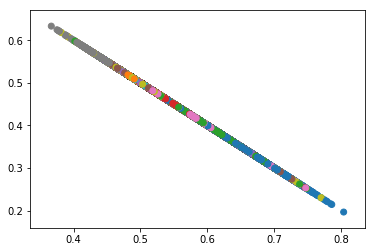

In [5]:
from matplotlib.colors import ListedColormap

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf'
         ]

cmap = ListedColormap(colors)


plt.scatter(y_latent[:, 0], y_latent[:, 1], c=y_train, cmap=cmap)
plt.show()

In [6]:
y_latent[:, 0] = y_latent[:, 0] * np.random.rand(60000)

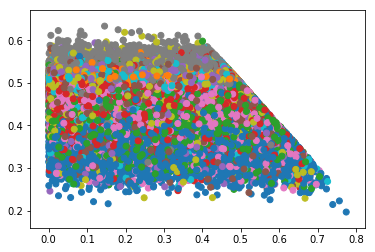

In [7]:
from matplotlib.colors import ListedColormap

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf'
         ]

cmap = ListedColormap(colors)


plt.scatter(y_latent[:, 0], y_latent[:, 1], c=y_train, cmap=cmap)
plt.show()

In [11]:
x =K.eye(3)
K.eval(x)

Instructions for updating:
Colocations handled automatically by placer.


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
var = 
var = 

In [18]:
y = K.tf.where(K.eye(3) > 0, K.zeros(shape=(3, 3)), K.ones(shape=(3, 3)))

In [19]:
K.eval(y)

array([[0., 1., 1.],
       [1., 0., 1.],
       [1., 1., 0.]], dtype=float32)

In [ ]:
def cost_func(y_true, y_pred):
    x_batch = y_true
    y_batch = y_pred

    # batch_size = K.int_shape(x_batch)[0]
    batch_size = 128    

    x_batch = K.reshape(x_batch, (batch_size, -1))
    y_batch = K.reshape(y_batch, (batch_size, -1))

    sigma = 784 / np.sqrt(2)
    
    t_mask = K.tf.where(K.eye(batch_size) > 0, 
                        K.zeros(shape=(batch_size, batch_size)), 
                        K.ones(shape=(batch_size, batch_size))
                       )

    rx = K.tf.reduce_sum( x_batch * x_batch, 1)
    rx = K.reshape(rx, (-1, 1))
    Gx = rx - 2 * K.tf.matmul(x_batch, K.tf.transpose(x_batch)) + K.tf.transpose(rx)
    x_numerator = K.exp( - Gx / (2 * np.square(sigma))) * t_mask
    x_denominator = K.tf.reduce_sum(x_numerator)
    
    ry = K.tf.reduce_sum( y_batch * y_batch, 1)
    ry = K.reshape(ry, (-1, 1))
    Gy = ry - 2 * K.tf.matmul(y_batch, K.tf.transpose(y_batch)) + K.tf.transpose(ry)
    y_numerator = (1 / (1 + Gy)) * t_mask
    y_denominator = K.tf.reduce_sum(y_numerator)

    P = x_numerator / x_denominator
    Q = y_numerator / y_denominator

    KL = K.tf.reduce_sum(P * K.log(P / Q))
    return KL

In [22]:
import numpy as np
from sklearn.manifold import TSNE

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])

tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)
X_embedded.shape

(4, 2)

In [23]:
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'random',
 'learning_rate': 200.0,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 1000,
 'n_iter_without_progress': 300,
 'perplexity': 30.0,
 'random_state': None,
 'verbose': 0}

In [39]:
y_latent = np.load("./log/base_tsne/y_latent.npy")

In [40]:
import tensorflow as tf

# Load data
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
# (X_train, y_train, X_test, y_test) = X_train[:, :, :, np.newaxis], y_train[:, np.newaxis], X_test[:, :, :, np.newaxis], y_test[:, np.newaxis]

In [41]:
y_latent.shape

(60000, 2)

In [42]:
y_train.shape

(60000,)

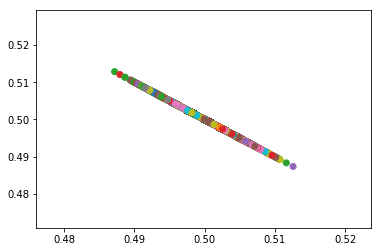

In [43]:
from matplotlib.colors import ListedColormap

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf'
         ]

cmap = ListedColormap(colors)

n_clusters = 10


plt.scatter(y_latent[:, 0], y_latent[:, 1], c=y_train, cmap=cmap)



(1797, 2)


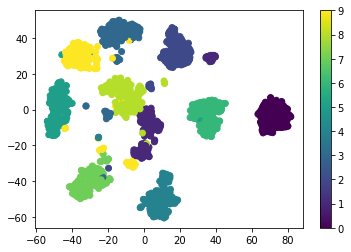

In [44]:
from sklearn import datasets
from sklearn.manifold import TSNE

digits = datasets.load_digits()

X_reduced = TSNE(n_components=2, random_state=0).fit_transform(digits.data)

print(X_reduced.shape)
# (1797, 2)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target)
plt.colorbar()